# Data collection

### Electricity data
* https://dashboard.elering.ee/  -- consumption, production, frequency, prices for Estonia
* https://www.nordpoolgroup.com/ 
* https://www.kaggle.com/

### Weather data
* https://rp5.ru/Weather_archive_in_Tallinn_(airport),_METAR  -- weather archives
* https://www.ilmateenistus.ee/

In [47]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Get data

In [93]:
el2022 = pd.read_csv('data/electricity-production and consumption_2022.csv',  delimiter=';',decimal=',')
el2022.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),Tarbimine,Tootmine,Planeeritud tarbimine,Planeeritud tootmine
0,1640988000,01.01.2022 00:00,899.4,419.5,903.1,462.4
1,1640991600,01.01.2022 01:00,892.1,431.9,935.8,469.1
2,1640995200,01.01.2022 02:00,874.3,428.1,897.6,458.6
3,1640998800,01.01.2022 03:00,860.1,435.7,878.5,471.9
4,1641002400,01.01.2022 04:00,842.7,429.2,891.1,472.2


In [94]:
raw_weather = pd.read_csv('data/weather_2022.csv',  delimiter=';', decimal='.', index_col = False)
raw_weather.head()

,Local time in Tallinn (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2022 23:00,5.8,744.1,747.2,-0.7,93.0,Wind blowing from the south-southwest,3.0,NaN,NaN,...,NaN,NaN,35.0,4.8,0.1,3.0,NaN,NaN,NaN,NaN
1,31.12.2022 22:00,5.9,744.3,747.3,-0.5,93.0,Wind blowing from the south-west,4.0,9.0,10.0,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2,31.12.2022 21:00,5.8,744.4,747.4,-0.3,93.0,Wind blowing from the south-southwest,4.0,8.0,NaN,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
3,31.12.2022 20:00,5.7,744.8,747.8,-0.5,94.0,Wind blowing from the south-west,4.0,9.0,NaN,...,NaN,NaN,35.0,4.8,0.5,12.0,NaN,NaN,NaN,NaN
4,31.12.2022 19:00,5.4,744.8,747.9,-0.8,96.0,Wind blowing from the south-west,4.0,8.0,NaN,...,NaN,NaN,20.0,4.8,0.3,3.0,NaN,NaN,NaN,NaN


## Parsing dates

### DST!!!!

In [95]:
print(el2022['Kuupaev (Eesti aeg)'].head())

0    01.01.2022 00:00
1    01.01.2022 01:00
2    01.01.2022 02:00
3    01.01.2022 03:00
4    01.01.2022 04:00
Name: Kuupaev (Eesti aeg), dtype: object


### Convert

In [96]:
el2022['timestamp'] = pd.to_datetime(el2022['Kuupaev (Eesti aeg)'], dayfirst=True)
el2022.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),Tarbimine,Tootmine,Planeeritud tarbimine,Planeeritud tootmine,timestamp
0,1640988000,01.01.2022 00:00,899.4,419.5,903.1,462.4,2022-01-01 00:00:00
1,1640991600,01.01.2022 01:00,892.1,431.9,935.8,469.1,2022-01-01 01:00:00
2,1640995200,01.01.2022 02:00,874.3,428.1,897.6,458.6,2022-01-01 02:00:00
3,1640998800,01.01.2022 03:00,860.1,435.7,878.5,471.9,2022-01-01 03:00:00
4,1641002400,01.01.2022 04:00,842.7,429.2,891.1,472.2,2022-01-01 04:00:00


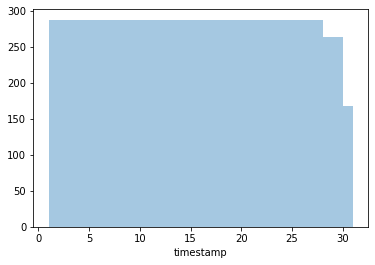

In [97]:
day_of_month = el2022['timestamp'].dt.day
sns.distplot(day_of_month, kde=False, bins=31);

In [98]:
raw_weather['timestamp'] = pd.to_datetime(raw_weather['Local time in Tallinn (airport)'], dayfirst=True)
raw_weather.set_index('timestamp', inplace=True)
raw_weather.drop(columns=['Local time in Tallinn (airport)'], inplace=True)
raw_weather.head()

,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-31 23:00:00,5.8,744.1,747.2,-0.7,93.0,Wind blowing from the south-southwest,3.0,NaN,NaN,100%.,...,NaN,NaN,35.0,4.8,0.1,3.0,NaN,NaN,NaN,NaN
2022-12-31 22:00:00,5.9,744.3,747.3,-0.5,93.0,Wind blowing from the south-west,4.0,9.0,10.0,100%.,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2022-12-31 21:00:00,5.8,744.4,747.4,-0.3,93.0,Wind blowing from the south-southwest,4.0,8.0,NaN,100%.,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2022-12-31 20:00:00,5.7,744.8,747.8,-0.5,94.0,Wind blowing from the south-west,4.0,9.0,NaN,100%.,...,NaN,NaN,35.0,4.8,0.5,12.0,NaN,NaN,NaN,NaN
2022-12-31 19:00:00,5.4,744.8,747.9,-0.8,96.0,Wind blowing from the south-west,4.0,8.0,NaN,100%.,...,NaN,NaN,20.0,4.8,0.3,3.0,NaN,NaN,NaN,NaN


# Describe

In [99]:
print(raw_weather.describe())

                 T           Po            P           Pa            U  \
count  8732.000000  8732.000000  8732.000000  8624.000000  8685.000000   
mean      7.148465   756.759116   759.825973     0.001020    78.729303   
std       8.622924     9.152670     9.185894     1.064299    16.945406   
min     -16.700000   717.700000   720.700000    -6.900000    14.000000   
25%       0.300000   752.175000   755.200000    -0.500000    67.000000   
50%       6.700000   757.900000   760.900000     0.000000    84.000000   
75%      13.000000   762.000000   765.100000     0.500000    93.000000   
max      32.000000   783.100000   786.300000     9.000000   100.000000   

                Ff         ff10          ff3           Tn           Tx  \
count  8721.000000  1305.000000  2404.000000  8649.000000  8649.000000   
mean      3.014219     9.702682    10.350666     4.446549     9.961510   
std       1.577299     2.169688     2.281426     7.774611     9.296164   
min       0.000000     1.000000     1

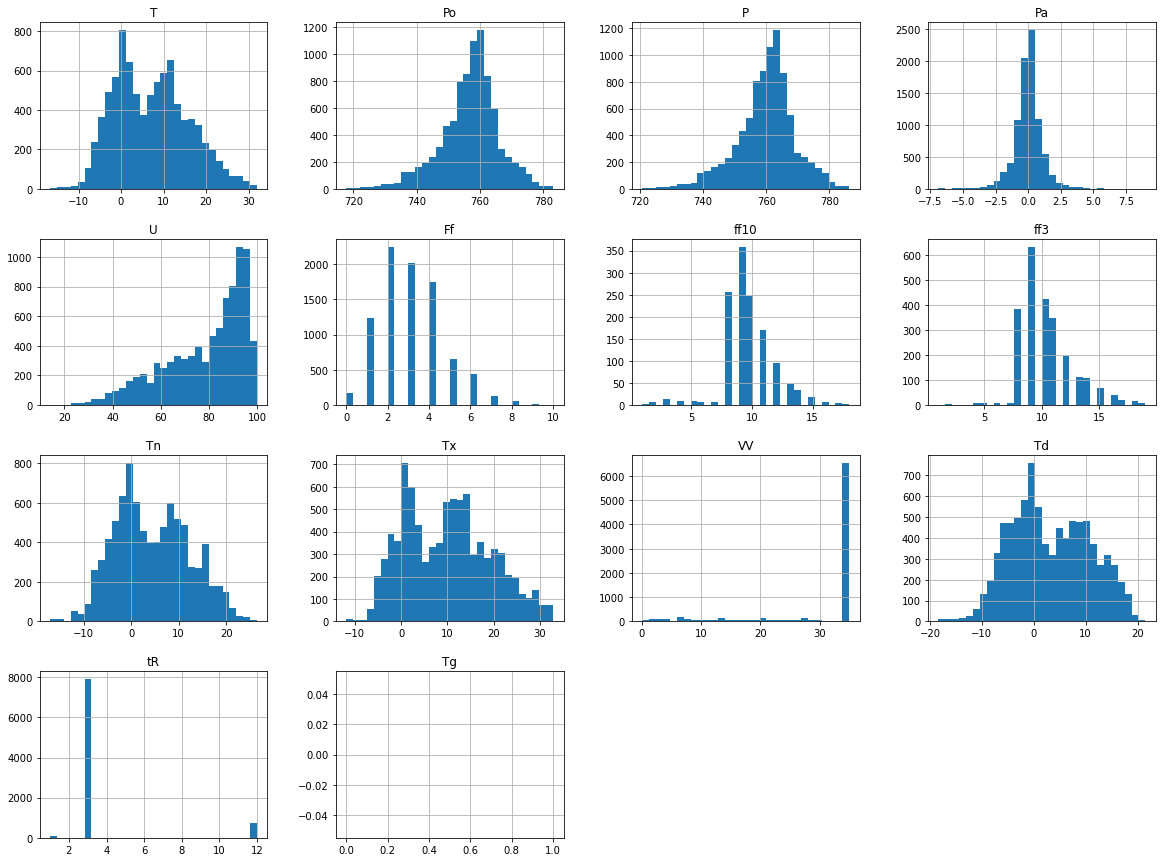

In [100]:
from math import ceil

raw_weather.hist(bins=30, figsize=(20, 15))
plt.show()

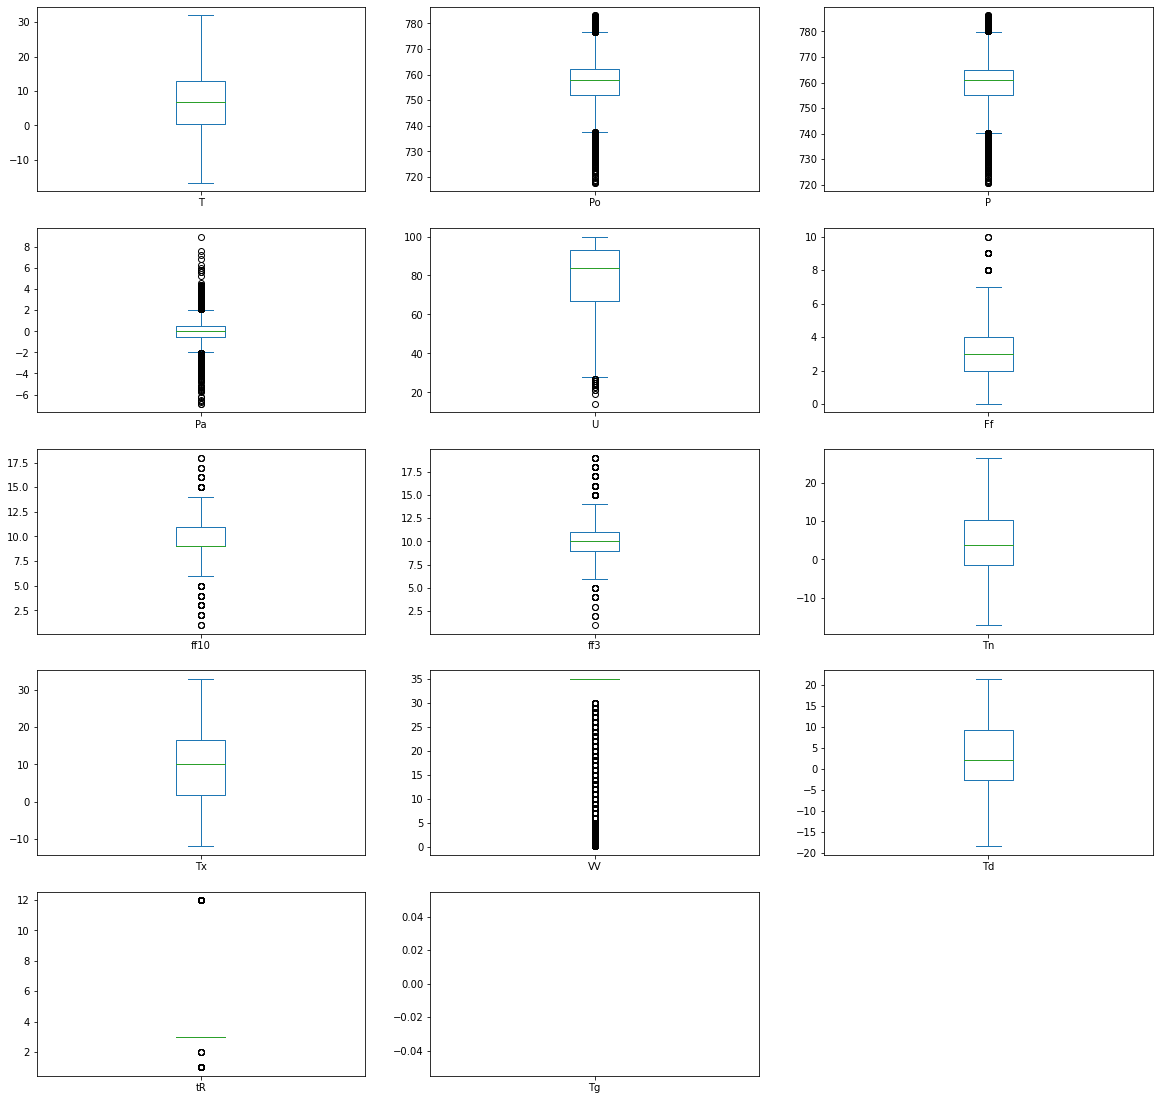

In [101]:
raw_weather.plot(kind='box', subplots=True, layout=(ceil(len(raw_weather.columns)/3), 3), figsize=(20,40))
plt.show()

# Outliers
 - logical outliers like midsummer, Christmas etc
 - errors
 - outliers

In [102]:
prices = pd.read_csv('data/electricity-nps price_2022.csv',  delimiter=';',decimal=',')
prices['timestamp'] = pd.to_datetime(prices['Kuupaev (Eesti aeg)'], dayfirst=True)
prices.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),NPS Lati,NPS Leedu,NPS Soome,NPS Eesti,timestamp
0,1640988000,01.01.2022 00:00,57.98,57.98,29.76,57.98,2022-01-01 00:00:00
1,1640991600,01.01.2022 01:00,50.05,50.05,46.60,50.05,2022-01-01 01:00:00
2,1640995200,01.01.2022 02:00,41.33,41.33,41.33,41.33,2022-01-01 02:00:00
3,1640998800,01.01.2022 03:00,42.18,42.18,42.18,42.18,2022-01-01 03:00:00
4,1641002400,01.01.2022 04:00,44.37,44.37,44.37,44.37,2022-01-01 04:00:00


In [103]:
pr = prices[['timestamp', 'NPS Eesti']]
pr.set_index('timestamp', inplace=True)
pr = pr.rename(columns = {'NPS Eesti':'value'})
pr.head()

,value
timestamp,
2022-01-01 00:00:00,57.98
2022-01-01 01:00:00,50.05
2022-01-01 02:00:00,41.33
2022-01-01 03:00:00,42.18
2022-01-01 04:00:00,44.37


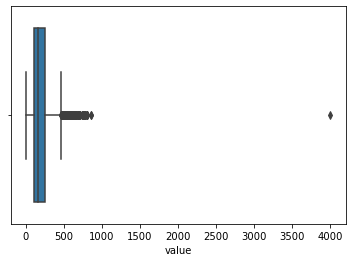

In [104]:
sns.boxplot(pr['value']);

### 10.08.22 price

In [105]:
ser = pd.Series(pr['value'])
ser.describe()

count    8760.000000
mean      192.824273
std       135.649117
min        -0.040000
25%       104.420000
50%       160.735000
75%       249.415000
max      4000.000000
Name: value, dtype: float64

* Trimming or Fixing Based Off Domain Knowledge
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

# Handling missing values

## Detecting missing values

In [106]:
el2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Ajatempel (UTC)        8760 non-null   int64         
 1   Kuupaev (Eesti aeg)    8760 non-null   object        
 2   Tarbimine              8760 non-null   float64       
 3   Tootmine               8760 non-null   float64       
 4   Planeeritud tarbimine  8760 non-null   float64       
 5   Planeeritud tootmine   8760 non-null   float64       
 6   timestamp              8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 479.2+ KB


In [107]:
missing_values = el2022.isnull().sum()
missing_values

Ajatempel (UTC)          0
Kuupaev (Eesti aeg)      0
Tarbimine                0
Tootmine                 0
Planeeritud tarbimine    0
Planeeritud tootmine     0
timestamp                0
dtype: int64

In [108]:
raw_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8732 entries, 2022-12-31 23:00:00 to 2022-01-01 00:00:00
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       8732 non-null   float64
 1   Po      8732 non-null   float64
 2   P       8732 non-null   float64
 3   Pa      8624 non-null   float64
 4   U       8685 non-null   float64
 5   DD      8720 non-null   object 
 6   Ff      8721 non-null   float64
 7   ff10    1305 non-null   float64
 8   ff3     2404 non-null   float64
 9   N       8607 non-null   object 
 10  WW      8732 non-null   object 
 11  W1      8653 non-null   object 
 12  W2      8650 non-null   object 
 13  Tn      8649 non-null   float64
 14  Tx      8649 non-null   float64
 15  Cl      2612 non-null   object 
 16  Nh      6289 non-null   object 
 17  H       6521 non-null   object 
 18  Cm      2120 non-null   object 
 19  Ch      2091 non-null   object 
 20  VV      8682 non-null   float64
 21  T

In [109]:
missing_values = raw_weather.isnull().sum()
missing_values

T          0
Po         0
P          0
Pa       108
U         47
DD        12
Ff        11
ff10    7427
ff3     6328
N        125
WW         0
W1        79
W2        82
Tn        83
Tx        83
Cl      6120
Nh      2443
H       2211
Cm      6612
Ch      6641
VV        50
Td        47
RRR       30
tR        30
E       8697
Tg      8732
E'      8567
sss     8582
dtype: int64

In [110]:
total_cells = np.product(raw_weather.shape)
total_missing = missing_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

29.91746286237812


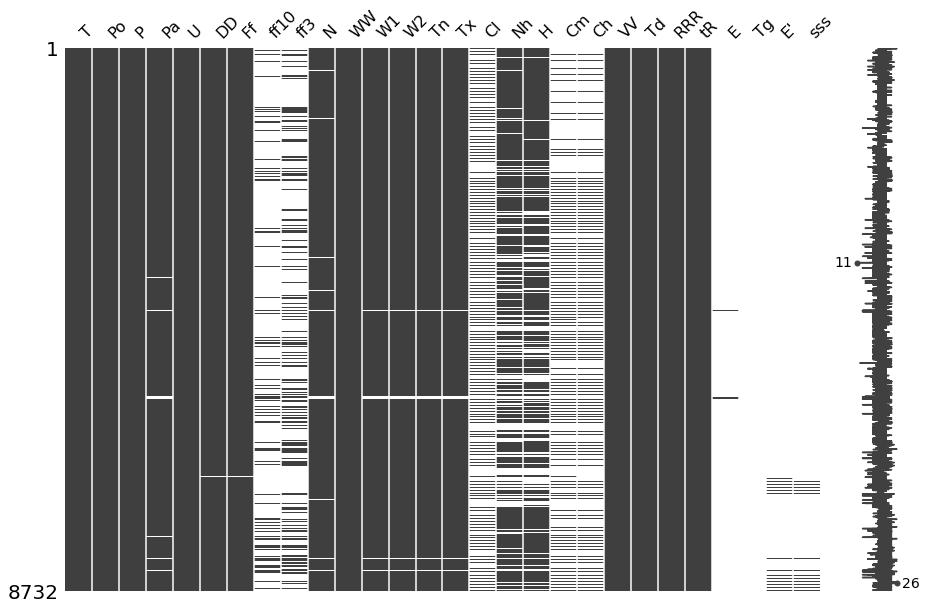

In [111]:
import missingno as msno

msno.matrix(raw_weather, figsize=(15,10))
plt.show();

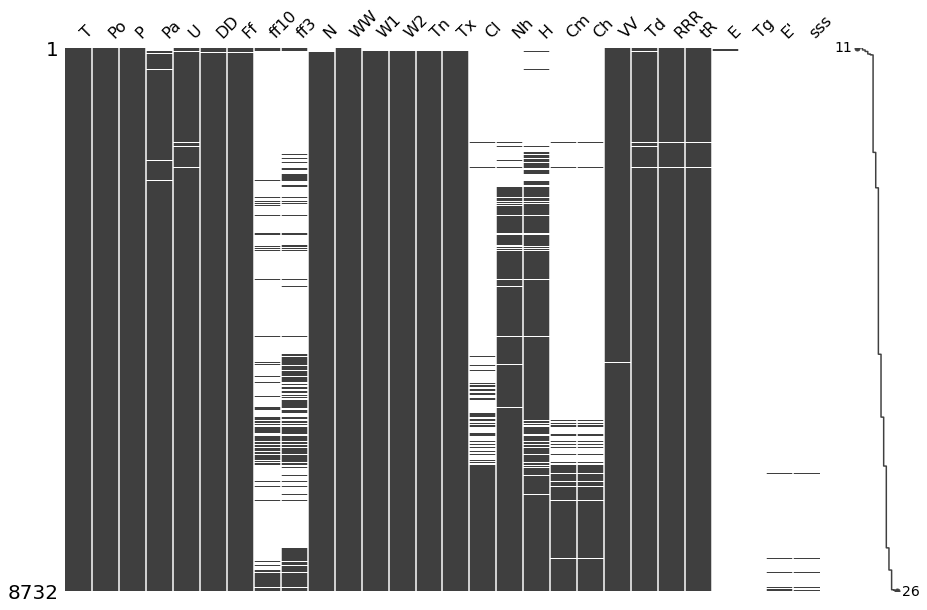

In [112]:
msno.matrix(raw_weather, sort='ascending',figsize=(15,10))
plt.show();

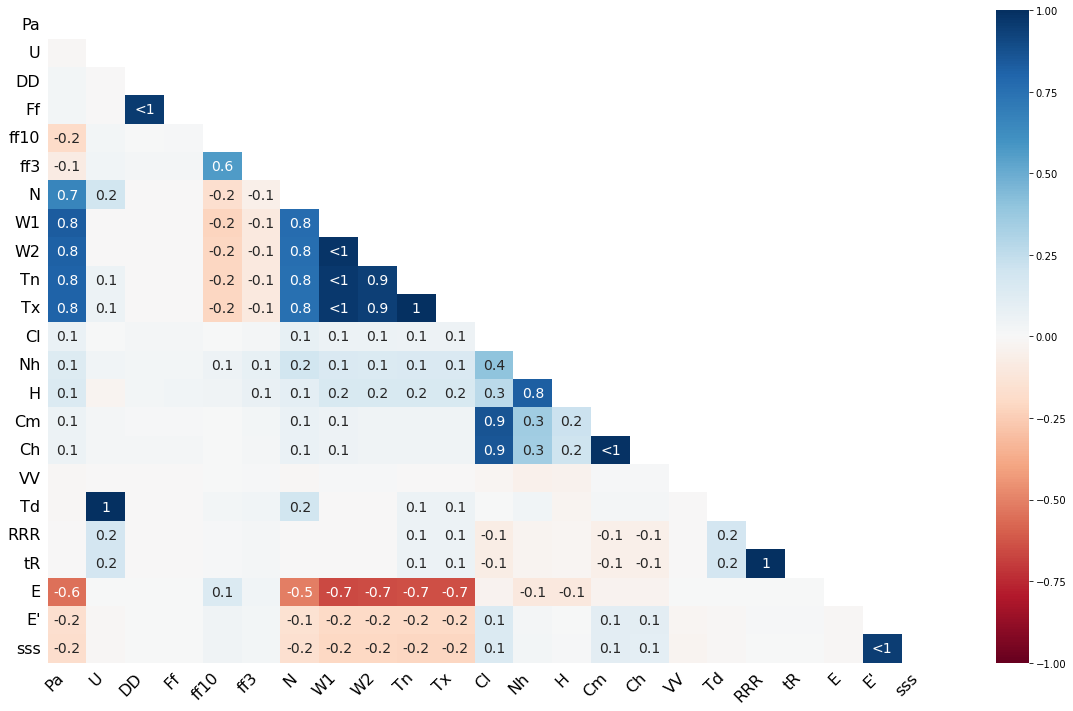

In [113]:
# The missingno correlation heatmap measures nullity correlation:
# how strongly the presence or absence of one variable affects the presence of another.
msno.heatmap(raw_weather)
plt.show()

## Deleting missing values

### Delete rows 

In [114]:
# remove all the rows that contain a missing value
raw_weather.dropna()

,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
timestamp,,,,,,,,,,,,,,,,,,,,,


### Delete columns

In [115]:
columns_with_na_dropped = raw_weather.dropna(axis=1)
columns_with_na_dropped.head()

,T,Po,P,WW
timestamp,,,,
2022-12-31 23:00:00,5.8,744.1,747.2,"Rain shower(s), slight."
2022-12-31 22:00:00,5.9,744.3,747.3,No significant weather observed.
2022-12-31 21:00:00,5.8,744.4,747.4,No significant weather observed.
2022-12-31 20:00:00,5.7,744.8,747.8,State of sky on the whole unchanged.
2022-12-31 19:00:00,5.4,744.8,747.9,No significant weather observed.


In [116]:
print("Columns in original dataset: %d \n" % raw_weather.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 28 

Columns with na's dropped: 4


## Imputation

In [117]:
humidity =  raw_weather[['U']]
humidity.head()

,U
timestamp,
2022-12-31 23:00:00,93.0
2022-12-31 22:00:00,93.0
2022-12-31 21:00:00,93.0
2022-12-31 20:00:00,94.0
2022-12-31 19:00:00,96.0


In [118]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8732 entries, 2022-12-31 23:00:00 to 2022-01-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   U       8685 non-null   float64
dtypes: float64(1)
memory usage: 136.4 KB


In [119]:
humidity.isnull().sum()

U    47
dtype: int64

In [120]:
missing = humidity[humidity.isnull()['U'] == True]
missing.head(5)

,U
timestamp,
2022-12-30 05:00:00,NaN
2022-12-30 04:00:00,NaN
2022-12-23 09:00:00,NaN
2022-12-23 08:00:00,NaN
2022-12-21 14:00:00,NaN


## Constant
Be careful with 0 values, ok for consmuption/production, but is it ok for temperature???

In [76]:
const = pd.DataFrame(humidity['U'].fillna(0))
const.rename(columns = {'U':'const'}, inplace=True)
missing = missing.join(const) 

In [77]:
missing.head(10)

,U,const
timestamp,,
2022-01-04 10:00:00,NaN,0.0
2022-01-04 21:00:00,NaN,0.0
2022-03-03 05:00:00,NaN,0.0
2022-03-03 10:00:00,NaN,0.0
2022-03-12 08:00:00,NaN,0.0
2022-03-12 09:00:00,NaN,0.0
2022-04-21 03:00:00,NaN,0.0
2022-05-30 05:00:00,NaN,0.0
2022-05-30 06:00:00,NaN,0.0


## Mean/mode/median

In [121]:
median = pd.DataFrame(humidity['U'].fillna(humidity['U'].median()))
median.rename(columns = {'U':'median'}, inplace=True)

missing = missing.join(median) 

In [122]:
missing.head(10)

,U,median
timestamp,,
2022-01-04 10:00:00,NaN,84.0
2022-01-04 21:00:00,NaN,84.0
2022-03-03 05:00:00,NaN,84.0
2022-03-03 10:00:00,NaN,84.0
2022-03-12 08:00:00,NaN,84.0
2022-03-12 09:00:00,NaN,84.0
2022-04-21 03:00:00,NaN,84.0
2022-05-30 05:00:00,NaN,84.0
2022-05-30 06:00:00,NaN,84.0


In [123]:
mean = pd.DataFrame(humidity['U'].fillna(humidity['U'].mean()))
mean.rename(columns = {'U':'mean'}, inplace=True)

missing = missing.join(mean) 

In [124]:
missing.head(10)

,U,median,mean
timestamp,,,
2022-01-04 10:00:00,NaN,84.0,78.729303
2022-01-04 21:00:00,NaN,84.0,78.729303
2022-03-03 05:00:00,NaN,84.0,78.729303
2022-03-03 10:00:00,NaN,84.0,78.729303
2022-03-12 08:00:00,NaN,84.0,78.729303
2022-03-12 09:00:00,NaN,84.0,78.729303
2022-04-21 03:00:00,NaN,84.0,78.729303
2022-05-30 05:00:00,NaN,84.0,78.729303
2022-05-30 06:00:00,NaN,84.0,78.729303


## Hot deck imputation

In [125]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
bfill = pd.DataFrame(humidity.fillna(method='bfill', axis=0).fillna(0))
bfill.rename(columns = {'U':'bfill'}, inplace=True)

missing = missing.join(bfill) 

In [126]:
missing.head(5)

,U,median,mean,bfill
timestamp,,,,
2022-01-04 10:00:00,NaN,84.0,78.729303,100.0
2022-01-04 21:00:00,NaN,84.0,78.729303,99.0
2022-03-03 05:00:00,NaN,84.0,78.729303,99.0
2022-03-03 10:00:00,NaN,84.0,78.729303,100.0
2022-03-12 08:00:00,NaN,84.0,78.729303,100.0


In [127]:
# previous
pad = pd.DataFrame(humidity.fillna(method='ffill', axis=0).fillna(0))
pad.rename(columns = {'U':'pad'}, inplace=True)

missing = missing.join(pad) 

In [128]:
missing.head(5)

,U,median,mean,bfill,pad
timestamp,,,,,
2022-01-04 10:00:00,NaN,84.0,78.729303,100.0,99.0
2022-01-04 21:00:00,NaN,84.0,78.729303,99.0,97.0
2022-03-03 05:00:00,NaN,84.0,78.729303,99.0,99.0
2022-03-03 10:00:00,NaN,84.0,78.729303,100.0,94.0
2022-03-12 08:00:00,NaN,84.0,78.729303,100.0,99.0


## Linear interpolation

In [129]:
li = humidity.interpolate(method ='linear', limit_direction ='forward')
li.rename(columns = {'U':'li'}, inplace=True)

missing = missing.join(li) 

In [130]:
missing.head(5)

,U,median,mean,bfill,pad,li
timestamp,,,,,,
2022-01-04 10:00:00,NaN,84.0,78.729303,100.0,99.0,99.500000
2022-01-04 21:00:00,NaN,84.0,78.729303,99.0,97.0,98.000000
2022-03-03 05:00:00,NaN,84.0,78.729303,99.0,99.0,99.000000
2022-03-03 10:00:00,NaN,84.0,78.729303,100.0,94.0,97.000000
2022-03-12 08:00:00,NaN,84.0,78.729303,100.0,99.0,99.666667


## MICE
https://medium.com/@brijesh_soni/topic-9-mice-or-multivariate-imputation-with-chain-equation-f8fd435ca91

In [88]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

In [131]:
#imputer = SimpleImputer(strategy='mean')
#imputer = SimpleImputer(strategy='median')

imputer = KNNImputer(n_neighbors=5)

imputed_values = imputer.fit_transform(raw_weather.reset_index()[['U','T']])
imputed_values = pd.DataFrame(imputed_values[:,0])
imputed_values.set_index(humidity.index, inplace=True)
imputed_values.rename(columns = {0:'mice'}, inplace=True)

In [132]:
missing = missing.join(imputed_values) 

In [133]:
missing.head(5)

,U,median,mean,bfill,pad,li,mice
timestamp,,,,,,,
2022-01-04 10:00:00,NaN,84.0,78.729303,100.0,99.0,99.500000,85.6
2022-01-04 21:00:00,NaN,84.0,78.729303,99.0,97.0,98.000000,82.2
2022-03-03 05:00:00,NaN,84.0,78.729303,99.0,99.0,99.000000,85.8
2022-03-03 10:00:00,NaN,84.0,78.729303,100.0,94.0,97.000000,88.8
2022-03-12 08:00:00,NaN,84.0,78.729303,100.0,99.0,99.666667,73.0


## Overview

In [134]:
missing

,U,median,mean,bfill,pad,li,mice
timestamp,,,,,,,
2022-01-04 10:00:00,NaN,84.0,78.729303,100.0,99.0,99.500000,85.6
2022-01-04 21:00:00,NaN,84.0,78.729303,99.0,97.0,98.000000,82.2
2022-03-03 05:00:00,NaN,84.0,78.729303,99.0,99.0,99.000000,85.8
2022-03-03 10:00:00,NaN,84.0,78.729303,100.0,94.0,97.000000,88.8
2022-03-12 08:00:00,NaN,84.0,78.729303,100.0,99.0,99.666667,73.0
2022-03-12 09:00:00,NaN,84.0,78.729303,100.0,99.0,99.333333,93.2
2022-04-21 03:00:00,NaN,84.0,78.729303,76.0,81.0,78.500000,81.2
2022-05-30 05:00:00,NaN,84.0,78.729303,100.0,100.0,100.000000,85.8
2022-05-30 06:00:00,NaN,84.0,78.729303,100.0,100.0,100.000000,80.8
